In [1]:
import deepNN as dnn
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
a, b = 0, 1
N = 100

x = (b - a) * torch.rand(N, 1) + a
# def func(x): return torch.sin(np.pi*x) 
# def dfunc(x): return np.pi*torch.cos(np.pi*x) 
# def deltafunc(x): return np.pi**2*torch.sin(np.pi*x) 
def func(x): return x**(3./2) 
def dfunc(x): return 3./2*x**(1./2)
def deltafunc(x): return -3./4*x**(-1./2)



y = func(x) 


nn = dnn.ResNet(torch.tanh, 1, [20]*4, 1) 
nn.box_init()


n_epochs = 50
n_lsgd_it = 12

def loss(x, data, net):
    y_pred = net(x)
    return 1.0/len(data) * torch.sum((y_pred - data)**2)


nn.lsgd(n_epochs, n_lsgd_it, input_data=x, data=y, loss_fun=loss)



/Users/cmarcati/Library/Mobile Documents/com~apple~CloudDocs/Teaching/MLCS/2024/labs/lab1_intro_to_NNs/deepNN.py:225: UserWarning: torch.lstsq is deprecated in favor of torch.linalg.lstsq and will be removed in a future PyTorch release.
torch.linalg.lstsq has reversed arguments and does not return the QR decomposition in the returned tuple (although it returns other information about the problem).
To get the qr decomposition consider using torch.linalg.qr.
The returned solution in torch.lstsq stored the residuals of the solution in the last m - n columns of the returned value whenever m > n. In torch.linalg.lstsq, the residuals in the field 'residuals' of the returned named tuple.
The unpacking of the solution, as in
X, _ = torch.lstsq(B, A).solution[:A.size(1)]
should be replaced with
X = torch.linalg.lstsq(A, B).solution (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:4169.)
  out_weight, _ = torch.lstsq(data, last_hidd

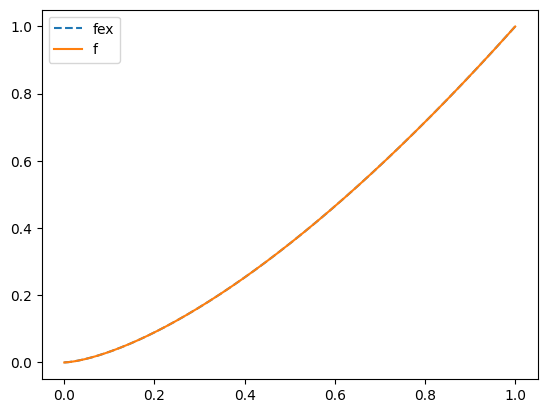

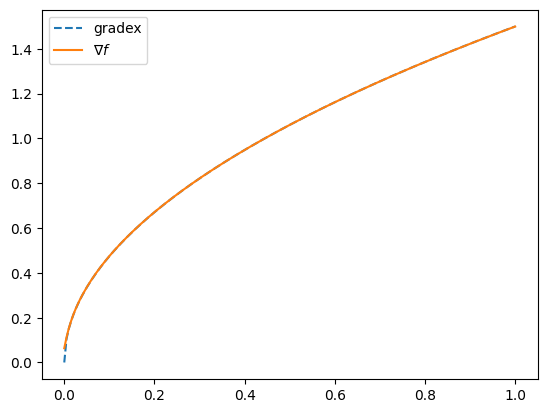

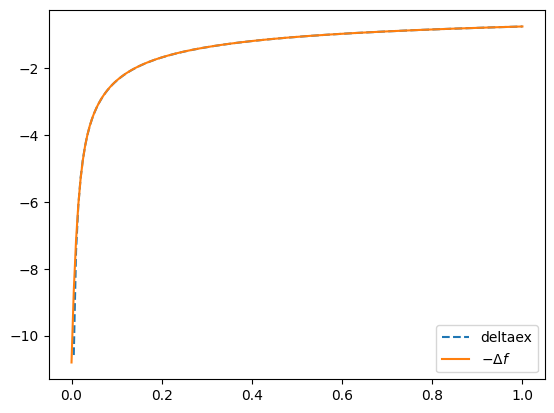

Report:
L2 error:4.0393796915003176e-05
H1 semi-norm error:0.004534948613177417


In [3]:
x = torch.linspace(0, 1, 200)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

yex = func(x).detach().numpy()
dyex = dfunc(x).detach().numpy()
deltaex = deltafunc(x).detach().numpy()

x_np = x.detach().numpy()
 
    

plt.plot(x_np, yex, '--', label='fex')
plt.plot(x_np, y.detach().numpy(), label='f')
plt.legend()
plt.show()

plt.plot(x_np, dyex, '--', label='gradex')
plt.plot(x_np, dy.flatten().detach().numpy(), label=r"$\nabla f$")
plt.legend()
plt.show()

plt.plot(x_np, deltaex, '--', label='deltaex')
plt.plot(x_np, deltay.detach().numpy(), label=r"$-\Delta f$")
plt.legend()
plt.show()


print('Report:')
print('L2 error:' + str(np.linalg.norm(y.flatten().detach().numpy()  -  yex)/np.sqrt(len(x_np))))
print('H1 semi-norm error:' + str(np.linalg.norm(dy.flatten().detach().numpy() - dyex)/np.sqrt(len(x_np))))

# Basis functions
By plotting the output of the last hidden layer, we see that they are basically constant - but the output layer's weights are rather big.

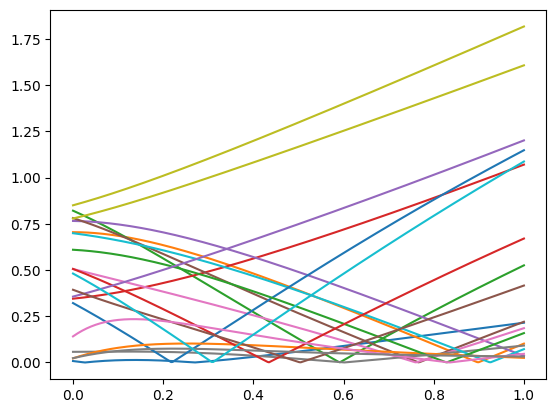

In [4]:
x = torch.linspace(0, 1, 300)

last_hidden_output = nn.output_layer(x, nn.L-1)
size_out = last_hidden_output.shape[1]

y = last_hidden_output@nn.output.weight.t()
x_np = x.detach().numpy()
out_np = last_hidden_output.detach().numpy()
plt.plot(x_np, np.abs(out_np))


In [5]:
nn.output.weight

Parameter containing:
tensor([[ -3441391.4647, -13089425.9139,  -2396506.0836,   3108759.2467,
           5816114.7323,    624603.6919,   4538239.1241,   2151982.5011,
          -2863283.9656,   -855564.3854,   4077635.9658,   -164286.1669,
           8441246.1014,  -1562664.7356,  -3342402.5256,  -3935042.3017,
            848528.9541,    676252.4691,   2491207.6534,   -158523.2105]])